###### 1.00/1.001 Engineering Computation and Data Science
# Problem Set 2
#### Due before March 3rd 2021 11:59 PM

In [1]:
# Useful Relevant Import Statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Boilerplate Answer Declaration
your_answer_here = '{{replace this variable with the your own statement for the correct code. }}'

# If you feel you need to import additional libraries,
# you can do so in the relevant question

## 2.1) What day of the week was 1/1/1970

In [2]:
myArray = np.array([1,2,3,4,5,6,7])
mySeries = pd.Series(myArray)
mySeries.index = pd.date_range(start='1/1/1970', periods=7)
mySeries.index.dayofweek

# Your Code Goes Here
print ("January 1st 1970 was a", your_answer_here)

January 1st 1970 was a {{replace this variable with the your own statement for the correct code. }}


## 2.2) UFO Data Analysis

In [3]:
# let's import the ufo data from the online collection
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

# and get a preview of the data we're working with
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


### 2.2.1) What day of the week has the most sightings?

In [4]:
# Your Code Goes Here
ufo["day_name"] = ufo['Time'].dt.day_name()

print("The most popular day of the week to report a UFO was", ufo["day_name"].mode()[0])

The most popular day of the week to report a UFO was Tuesday


### 2.2.2) On the day of the week with most sightings plot a histogram the time of day the sightings occured
Give the slight confusion on the earlier version of this question; we will accept a plot for the day of the week (*e.g. Saturday, Sunday, etc.*) with the most UFO sightings OR the calendar date (*e.g. January 19 2001, November 3 1989*) with the most UFO sightings.

Text(0.5, 0, 'hour')

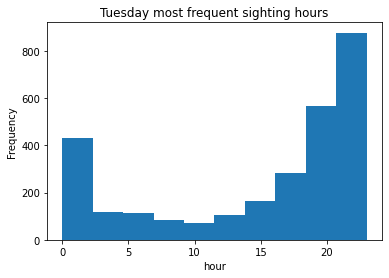

In [5]:
# Your Code Goes Here
ufo['hour'] = ufo['Time'].dt.hour
is_tuesday =  ufo['day_name']=="Tuesday"

ax = ufo[is_tuesday]['hour'].plot.hist()
ax.set_title('Tuesday most frequent sighting hours')
ax.set_xlabel("hour")

### 2.2.3) Do the same for the calendar date with the 2nd most sightings

Text(0.5, 0, 'hour')

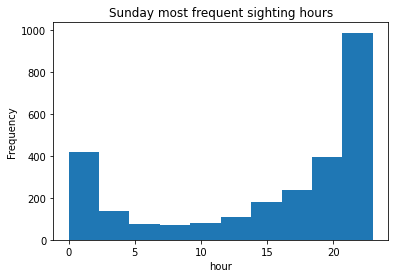

In [6]:
# Your Code Goes Here
is_not_tuesday = ~is_tuesday
second_mode = ufo[is_not_tuesday]["day_name"].mode()[0]

is_second_mode =  ufo['day_name']==second_mode

ax = ufo[is_second_mode]['hour'].plot.hist()
ax.set_title(second_mode + ' most frequent sighting hours')
ax.set_xlabel("hour")

### 2.2.4) For extra credit - Are there any deductions or patterns you see in the data? Justify with plots or data.
One possible idea here, is to answer the opposite question you answered in 2.2.2. (*e.g. if you answered day of week then do calendar date here*); however, we will accept any observations you make here provided you substantiate them with data analysis.

In [7]:
# Your Code Goes Here

### Observation 1
The time of day is consistent across days of the week - generally at night

array([[<AxesSubplot:title={'center':'Friday'}>,
        <AxesSubplot:title={'center':'Monday'}>,
        <AxesSubplot:title={'center':'Saturday'}>],
       [<AxesSubplot:title={'center':'Sunday'}>,
        <AxesSubplot:title={'center':'Thursday'}>,
        <AxesSubplot:title={'center':'Tuesday'}>],
       [<AxesSubplot:title={'center':'Wednesday'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

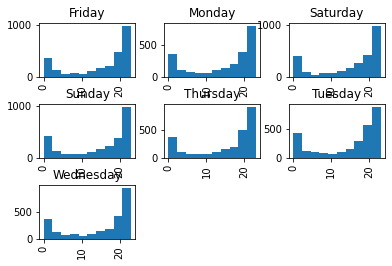

In [8]:
ufo.hist(column='hour', by = 'day_name')

### Observation 2
Observations spiked in the last 5 or so years (1995-2000).

<AxesSubplot:>

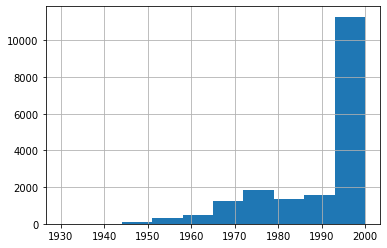

In [9]:
ufo['Time'].dt.year.hist()

### Observation 3:
###### The most observed days are considerable.
The day with the most observations is November 16th, 1999, at which point 187 sighting are in the database. The next most is March 13th, 1997 with 78 - less than half.

In [10]:
ufo['date_only'] = ufo['Time'].dt.date
top_dates = ufo.groupby('date_only').count().sort_values(by=['hour'], ascending=False)
top_dates.iloc[:20]

,City,Colors Reported,Shape Reported,State,Time,day_name,hour
date_only,,,,,,,
1999-11-16,187,51,179,187,187,187,187
1997-03-13,76,8,67,76,76,76,76
1997-07-04,69,38,65,69,69,69,69
1999-09-01,67,13,55,67,67,67,67
1999-08-15,47,7,35,47,47,47,47
1997-06-01,39,5,33,39,39,39,39
1976-06-01,39,1,35,39,39,39,39
1998-09-23,39,22,39,39,39,39,39
1999-06-01,38,3,34,38,38,38,38
